In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn import datasets, linear_model
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
nsamp, natt = X.shape
print("num samples={0:d}  num attributes={1:d}".format(nsamp,natt))

num samples=442  num attributes=10


In [ ]:
df_diabetes = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
df_diabetes['age'].head(5)

0    0.038076
1   -0.001882
2    0.085299
3   -0.089063
4    0.005383
Name: age, dtype: float64

In [ ]:
df_diabetes.iloc[10:16, 4:7]

,s1,s2,s3
10,-0.103389,-0.090561,-0.013948
11,-0.007073,0.045972,-0.065491
12,-0.004321,-0.009769,0.044958
13,-0.004321,-0.015719,-0.002903
14,0.017694,-0.000061,0.081775
15,0.089244,0.107662,-0.039719


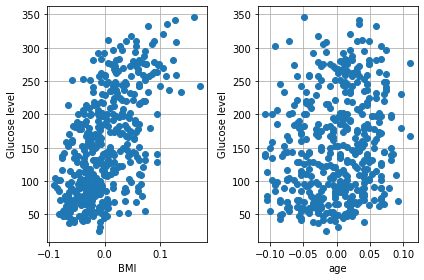

In [ ]:
x =np.array(df_diabetes['bmi'])
plt.subplot(1,2,1)
plt.plot(x,y,'o')
plt.xlabel('BMI')
plt.ylabel('Glucose level')
plt.grid(True)

plt.subplot(1,2,2)
x = np.array(df_diabetes['age'])
plt.plot(x,y,'o')
plt.xlabel('age')
plt.ylabel('Glucose level')
plt.grid(True)

plt.tight_layout()

In [ ]:
ym = np.mean(y)
syy = np.mean((y-ym)**2)
Rsq = np.zeros(natt)
beta0 = np.zeros(natt)
beta1 = np.zeros(natt)
for k in range(natt):
    xm = np.mean(X[:,k])
    sxy = np.mean((X[:,k]-xm)*(y-ym))
    sxx = np.mean((X[:,k]-xm)**2)
    beta1[k] = sxy/sxx
    beta0[k] = ym - beta1[k]*xm
    Rsq[k] = (sxy)**2/sxx/syy
    
    print("{0:2d} Rsq={1:f} beta0={2:f} beta1={3:f}".format(k,Rsq[k],beta0[k],beta1[k]))

 0 Rsq=0.035302 beta0=152.133484 beta1=304.183075
 1 Rsq=0.001854 beta0=152.133484 beta1=69.715356
 2 Rsq=0.343924 beta0=152.133484 beta1=949.435260
 3 Rsq=0.194908 beta0=152.133484 beta1=714.741644
 4 Rsq=0.044954 beta0=152.133484 beta1=343.254452
 5 Rsq=0.030295 beta0=152.133484 beta1=281.784593
 6 Rsq=0.155859 beta0=152.133484 beta1=-639.145279
 7 Rsq=0.185290 beta0=152.133484 beta1=696.883030
 8 Rsq=0.320224 beta0=152.133484 beta1=916.138723
 9 Rsq=0.146294 beta0=152.133484 beta1=619.222821


In [ ]:
ym = np.mean(y) 
y1 = y-ym  # a column vecotor each minus mean
Xm = np.mean(X,axis=0) # averaging over column, resulting a row vector of dimension natt

X1 = X - Xm[None,:] # minus the same mean in each column


# Compute the correlations per features
syy = np.mean(y1**2)
Sxx = np.mean(X1**2,axis=0) #a row vector with each element indicating the variance of one attribute
Sxy = np.mean(X1*y1[:,None],axis=0) #a row vector with each element indicating the covarance on one attribute to the targer

# Compute the coefficients and R^2 value per feature
beta1 = Sxy/Sxx # element wise division, resulting a row vector containing  beta1 for each attribute
beta0 = ym - beta1*Xm # element wise multiplication, resulting a row vector containing beta0 for each attribute
Rsq = Sxy**2/Sxx/syy #a row vector containing Rsq for each attribute

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]] [-3.63428493e-16  1.30834257e-16 -8.04534920e-16  1.28165452e-16
 -8.83531559e-17  1.32702421e-16 -4.57464634e-16  3.77730150e-16
 -3.83085422e-16 -3.41288202e-16]


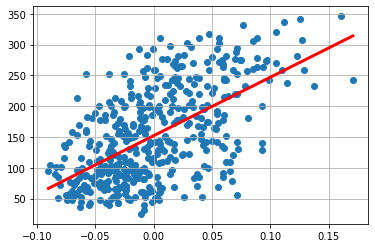

In [ ]:
#Find the index of the single variable with the best R^2
imax = np.argmax(Rsq)


# Regression line over the range of x values
xmin = np.min(X[:,imax])
xmax = np.max(X[:,imax])
ymin = beta0[imax] + beta1[imax]*xmin
ymax = beta0[imax] + beta1[imax]*xmax
plt.plot([xmin,xmax], [ymin,ymax], 'r-', linewidth=3)

# Scatter plot of points
plt.scatter(X[:,imax],y)
plt.grid()

In [ ]:
ns_train = 300
ns_test = nsamp - ns_train
X_tr = X[:ns_train,:]     # Gets the first ns_train rows of X
y_tr = y[:ns_train]       # Gets the correspoinding rows of y

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regr.intercept_

152.34786451820108

In [ ]:
regr.coef_

array([ -16.57607993, -254.66532396,  560.98630022,  278.91811152,
       -393.41357305,   97.05460405,  -19.0023093 ,  169.46450327,
        632.95050374,  114.21638941])

In [ ]:
y_tr_pred = regr.predict(X_tr)
RSS_tr = np.mean((y_tr_pred-y_tr)**2)/(np.std(y_tr)**2)
Rsq_tr = 1-RSS_tr
print("RSS per sample = {0:f}".format(RSS_tr))
print("R^2 =            {0:f}".format(Rsq_tr))

RSS per sample = 0.485281
R^2 =            0.514719


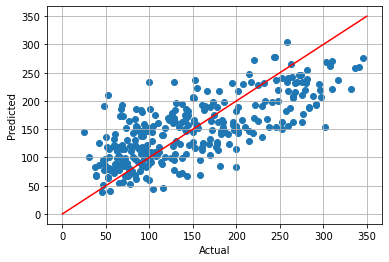

In [ ]:
plt.scatter(y_tr,y_tr_pred)
plt.plot([0,350],[0,350], 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()


In [ ]:
X_test = X[ns_train:,:]
y_test = y[ns_train:]
y_test_pred = regr.predict(X_test)
RSS_test = np.mean((y_test_pred-y_test)**2)/(np.std(y_test)**2)
Rsq_test = 1-RSS_test
print("RSS per sample = {0:f}".format(RSS_test))
print("R^2 =            {0:f}".format(Rsq_test))

RSS per sample = 0.492801
R^2 =            0.507199


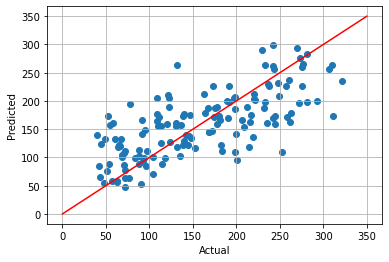

In [ ]:
plt.scatter(y_test,y_test_pred)
plt.plot([0,350],[0,350],'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

In [ ]:
x1 = np.array([0,1,3,5,4])
x2 = np.array([0,0.7, 4.3, 15.1, 13.2])
y = np.array([-2, -0.9, 1.5, 18, 13])
y_transpose = y.transpose()
X = np.stack((x1, x2), axis=-1)
print(X)
type(X)


[[ 0.   0. ]
 [ 1.   0.7]
 [ 3.   4.3]
 [ 5.  15.1]
 [ 4.  13.2]]


numpy.ndarray

In [ ]:
ym = np.mean(y_transpose) 
y1 = y_transpose-ym  # a column vecotor each minus mean
Xm = np.mean(X,axis=0) # averaging over column, resulting a row vector of dimension natt
X1 = X - Xm[None,:] # minus the same mean in each column

# Compute the correlations per features
syy = np.mean(y1**2)
Sxx = np.mean(X1**2,axis=0) #a row vector with each element indicating the variance of one attribute
Sxy = np.mean(X1*y1[:,None],axis=0) #a row vector with each element indicating the covarance on one attribute to the targer

# Compute the coefficients and R^2 value per feature
beta1 = Sxy/Sxx # element wise division, resulting a row vector containing  beta1 for each attribute
beta0 = ym - beta1*Xm # element wise multiplication, resulting a row vector containing beta0 for each attribute
Rsq = Sxy**2/Sxx/syy #a row vector containing Rsq for each attribute

for k in range(2):
    print("{0:2d} Rsq={1:f} beta0={2:f} beta1={3:f}".format(k,Rsq[k],beta0[k],beta1[k]))

 0 Rsq=0.843282 beta0=-4.455814 beta1=3.990698
 1 Rsq=0.980841 beta0=-2.497461 beta1=1.263883


In [ ]:
ns_train =4
ns_test = 1
X_tr = X[:ns_train, :]
y_tr = y[:ns_train]

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_tr, y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regr.intercept_

-1.5335611038107757

In [ ]:
regr.coef_

array([-1.3532523,  1.7369908])

In [ ]:
X = np.arange(24).reshape(2,3,4)  # shape = (2,3,4)
print(np.shape(X));
Y1 = np.sum(X,axis=0)             # shape = (3,4)
Y2 = np.sum(X,axis=1)             # shape = (2,4)
Y3 = np.sum(X,axis=2)
print('X = ')
print(X)
print('\n Y1 = \n ')
print(Y1)
print('\n Y2 = \n')
print(Y2)
print('\n Y3 = ')
print(Y3)

(2, 3, 4)
X = 
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]

 Y1 = 
 
[[12 14 16 18]
 [20 22 24 26]
 [28 30 32 34]]

 Y2 = 

[[12 15 18 21]
 [48 51 54 57]]

 Y3 = 
[[ 6 22 38]
 [54 70 86]]


In [ ]:
X = np.random.rand(4,3)
X_sum = np.sum(X, axis=1)
#print(X_sum.shape)
Y = X[:,:] / X_sum[:, None]
print(Y)

(4,)
[[0.00687489 0.34469848 0.64842663]
 [0.25260686 0.35402013 0.39337301]
 [0.111844   0.60516968 0.28298632]
 [0.24495265 0.40223567 0.35281168]]


In [ ]:
X = np.random.rand(5,3)
d = np.random.rand(5)
Y = np.matmul(np.diag(d), X)
print(Y)


[[0.29143233 0.13380181 0.20550712]
 [0.01971214 0.04203064 0.04381962]
 [0.2391025  0.02947867 0.21294987]
 [0.39074737 0.13507322 0.39205643]
 [0.34722097 0.14952275 0.3057743 ]]
